In [ ]:
import math

def binDistributionProbability(n, x, p):
  return math.comb(n, x) * pow(p, x) * pow(1 - p, n - x)

def getProbability(n: int, prob: float):
  res = 0
  for i in range(1, n + 1):
    res += binDistributionProbability(n, i, prob)
  return round(res, 4)

In [ ]:
def getReward(player_choice, dice_rolls):
  n = dice_rolls.count(player_choice)
  if n > 1:
    return n - 1
  return -1

In [ ]:
def getExpectedReturn(n: int, prob: float):
  res = 0
  for i in range(0, n + 1):
    res += (binDistributionProbability(n, i, prob) * (i - 1 if i > 1 else -1))
  return round(res, 4)

In [ ]:
prob = 1/6
getProbability(5, prob)

0.5981

In [ ]:
getExpectedReturn(5, prob)

-0.5685

In [ ]:
n = 6
for i in range(0, n + 1):
  print(i, round(binDistributionProbability(n, i, prob), 4), str(round(binDistributionProbability(n, i, prob) * (i - 1 if i > 1 else -1), 4)) + 'x')

0 0.3349 -0.3349x
1 0.4019 -0.4019x
2 0.2009 0.2009x
3 0.0536 0.1072x
4 0.008 0.0241x
5 0.0006 0.0026x
6 0.0 0.0001x


In [ ]:
getExpectedReturn(6, prob)

-0.4019

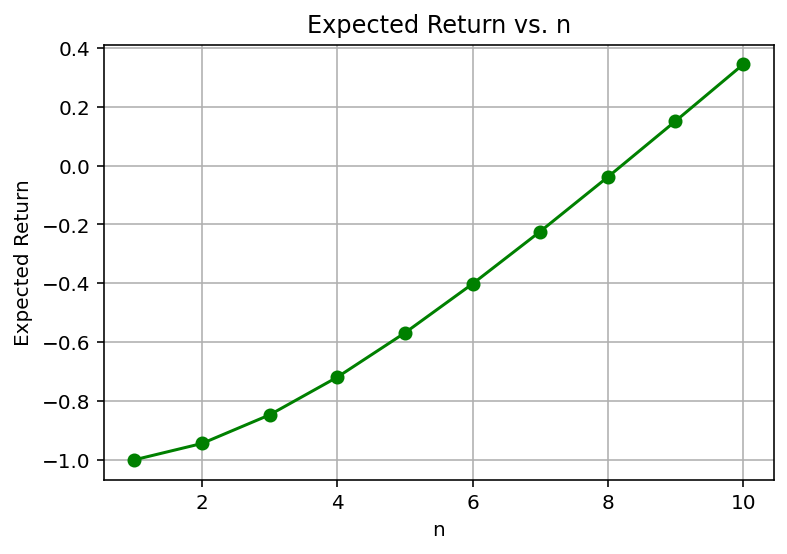

In [ ]:
# prompt: plot expectedReturn against n where n is in x axis ranging from 1 to 10. highlight each plotted point in green

import math
import matplotlib.pyplot as plt

prob = 1/6
n_values = list(range(1, 11))
expected_returns = [getExpectedReturn(n, prob) for n in n_values]

plt.plot(n_values, expected_returns, marker='o', linestyle='-', color='green')
plt.xlabel('n')
plt.ylabel('Expected Return')
plt.title('Expected Return vs. n')
plt.grid(True)
plt.show()

In [ ]:
print(getExpectedReturn(4, prob) / 4)
print(getExpectedReturn(5, prob) / 5)

-0.179775
-0.1137


In [ ]:
# prompt: generate a roll die

import random

def roll_die():
  """Simulates rolling a six-sided die."""
  return random.randint(1, 6)

def roll_dice(num_dice):
  """Simulates rolling a specified number of dice."""
  results = []
  for _ in range(num_dice):
    results.append(roll_die())
  return results

num_dice = 6
epochs = 10
for _ in range(epochs):
  dice_rolls = roll_dice(num_dice)
  dice_rolls.sort()
  print(dice_rolls)



# one player plays the same number
# one player plays random numbers
# n players play different number
# 6 players play 6 numbers
# simulate random m agents with each having limited amounts

[1, 3, 4, 4, 4, 4]
[2, 4, 4, 5, 5, 6]
[2, 2, 3, 3, 4, 6]
[1, 4, 4, 4, 4, 5]
[1, 1, 2, 4, 4, 5]
[2, 4, 5, 6, 6, 6]
[2, 5, 5, 5, 6, 6]
[1, 2, 3, 4, 5, 5]
[1, 2, 5, 5, 6, 6]
[2, 4, 4, 5, 6, 6]


Amount earned: -4100


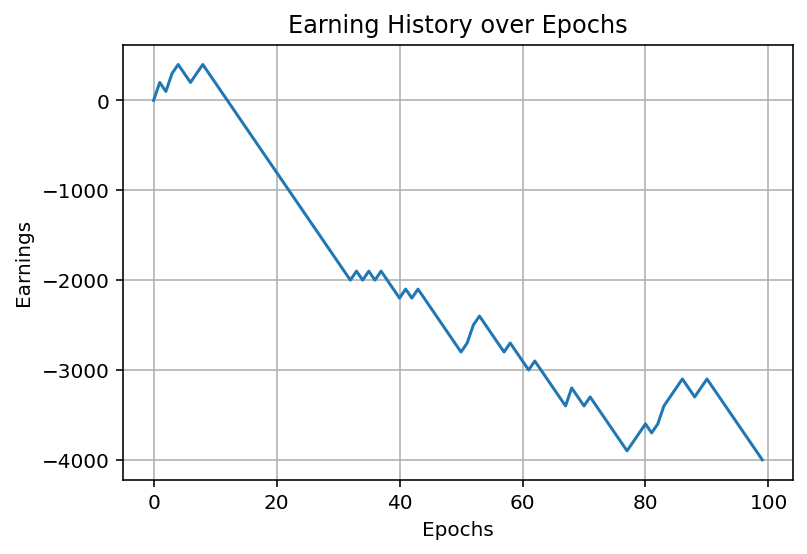

In [ ]:
# one player plays the same number
import matplotlib.pyplot as plt

num_dice = 6
epochs = 100

player_choice = 3
earning_history = []
total_amount = 0
for _ in range(epochs):
  dice_rolls = roll_dice(num_dice)
  dice_rolls.sort()
  cur_amount = 100 * getReward(3, dice_rolls)
  earning_history.append(total_amount)
  total_amount += cur_amount

print("Amount earned:", total_amount)


plt.plot(range(epochs), earning_history)
plt.xlabel('Epochs')
plt.ylabel('Earnings')
plt.title('Earning History over Epochs')
plt.grid(True)
plt.show()

Amounts earned by players:
[0, -36700, -41000, -39000, -44800, -41100, -42900]
Amount earned by dealer:
245500


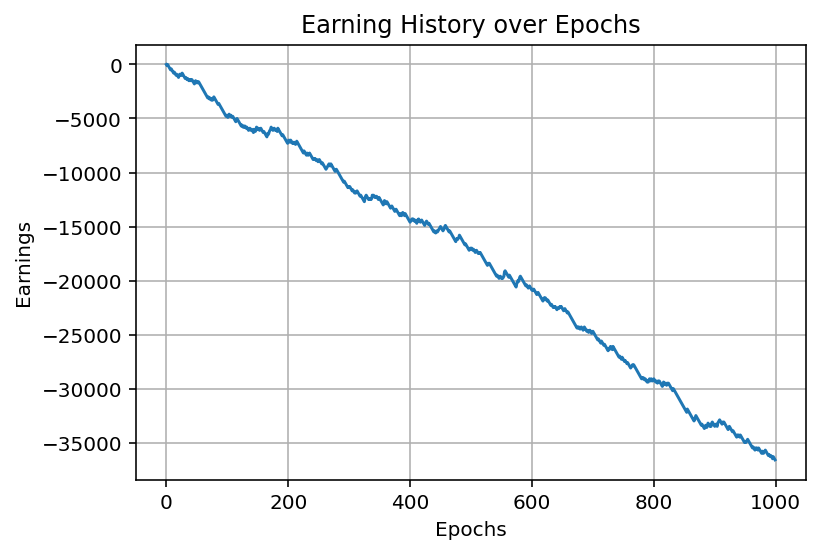

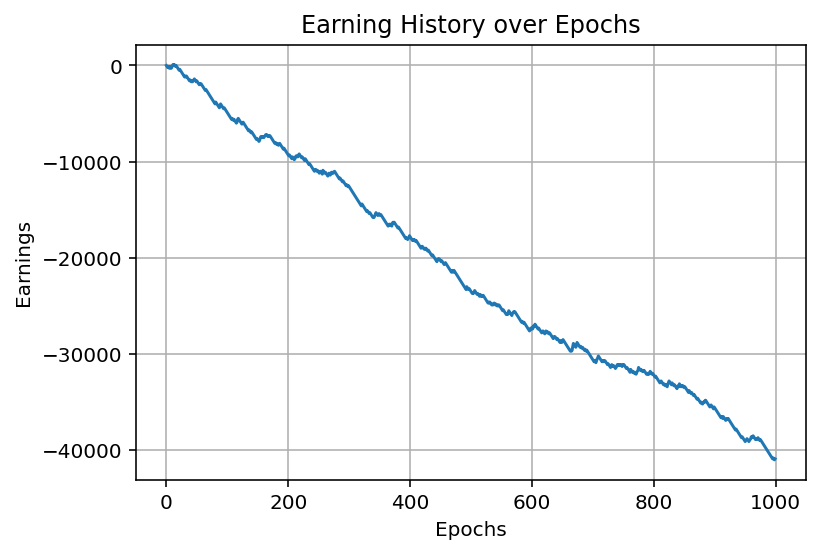

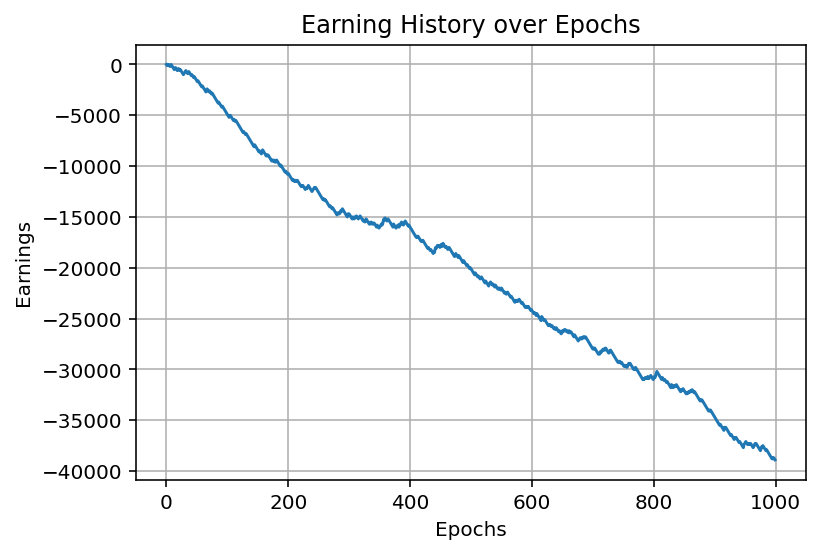

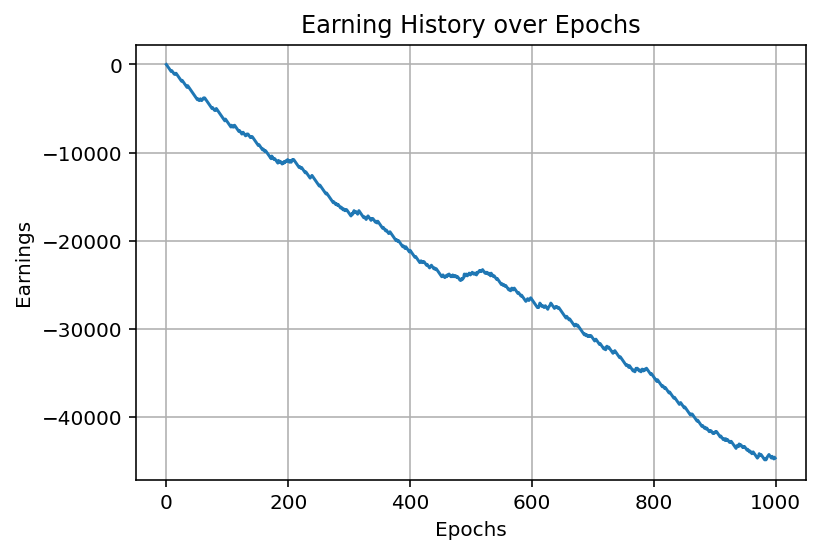

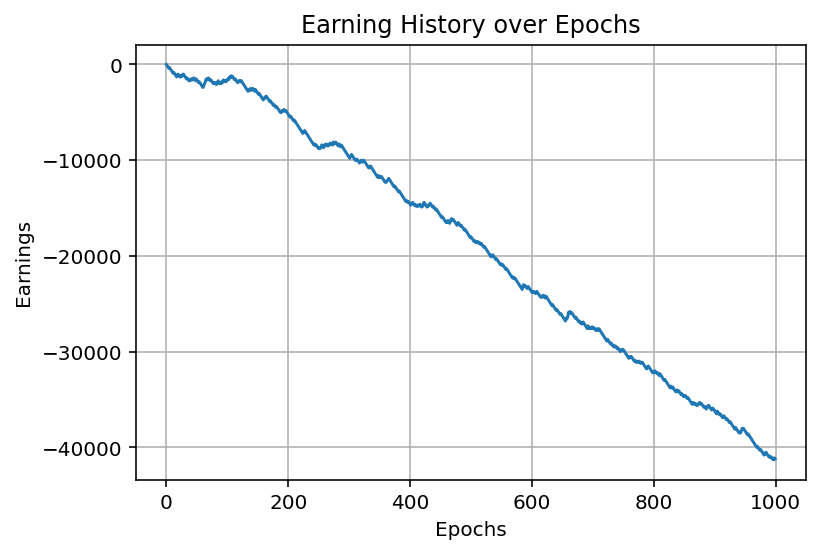

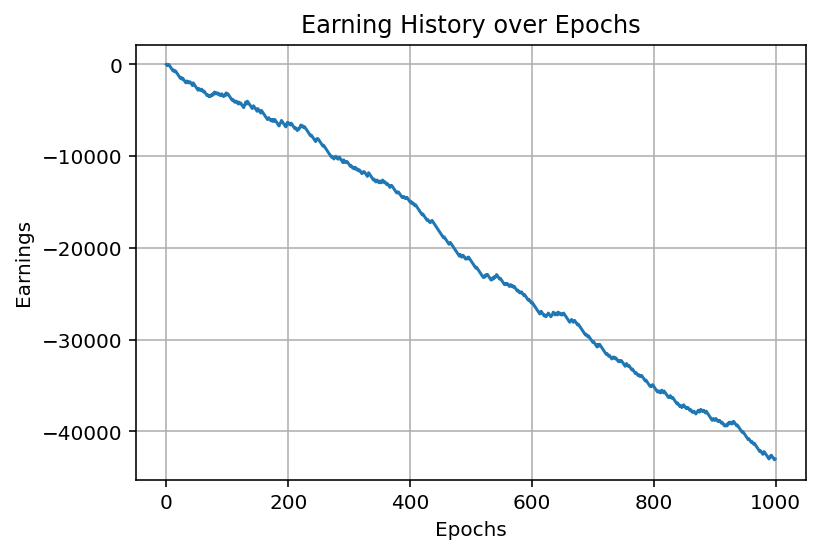

In [ ]:
 # 6 players play 6 numbers
import matplotlib.pyplot as plt

num_dice = 6
epochs = 1000

player_choice = 3
earning_history = []
total_amounts = []
for i in range(0, 7):
  earning_history.append([])
  total_amounts.append(0)

for _ in range(epochs):
  dice_rolls = roll_dice(num_dice)
  dice_rolls.sort()
  cur_amount = 100 * getReward(3, dice_rolls)
  for player_id in range(1, 7):
    player_choice = player_id
    cur_amount = 100 * getReward(player_choice, dice_rolls)
    earning_history[player_id].append(total_amounts[player_id])
    total_amounts[player_id] += cur_amount

print("Amounts earned by players:")
print(total_amounts)

print("Amount earned by dealer:")
print(-1 * sum(total_amounts))

for i in range(1, 7):
  plt.plot(range(epochs), earning_history[i])
  plt.xlabel('Epochs')
  plt.ylabel('Earnings')
  plt.title('Earning History over Epochs')
  plt.grid(True)
  plt.show()

Amounts earned by players:
[10000, 0, 0, 0, 0, 0, 200]
Amount earned by dealer:
49800


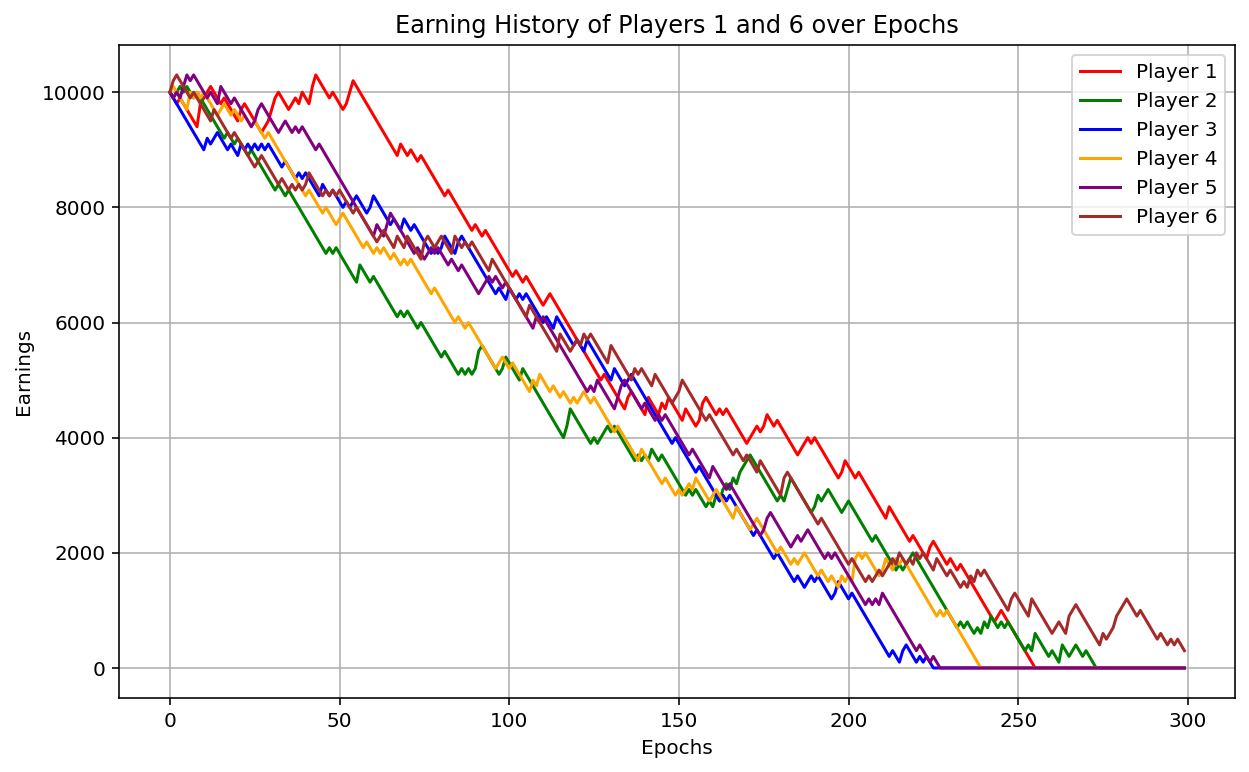

In [ ]:
 # 6 players play 6 numbers but with limited amount
import matplotlib.pyplot as plt

num_dice = 6
epochs = 300
starting_amount = 10000
base_betting_amount = 100
player_choice = 3
earning_history = []
total_amounts = []
for i in range(0, 7):
  earning_history.append([])
  total_amounts.append(starting_amount)

for _ in range(epochs):
  dice_rolls = roll_dice(num_dice)
  dice_rolls.sort()
  for player_id in range(1, 7):
    player_choice = player_id
    if total_amounts[player_id] >= base_betting_amount:
      cur_amount = base_betting_amount * getReward(player_choice, dice_rolls)
    else:
      cur_amount = 0
    earning_history[player_id].append(total_amounts[player_id])
    total_amounts[player_id] += cur_amount

print("Amounts earned by players:")
print(total_amounts)

print("Amount earned by dealer:")
print( (6 * starting_amount) - sum(total_amounts))



plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization

# Define a list of colors for the lines. You can customize this list if you want different colors.
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']

for i in range(1, 7):  # Iterate through the player IDs
    plt.plot(range(epochs), earning_history[i], label=f'Player {i}', color=colors[i-1])

plt.xlabel('Epochs')
plt.ylabel('Earnings')
plt.title('Earning History of Players 1 and 6 over Epochs')
plt.legend() # Show the legend
plt.grid(True)
plt.show()

In [ ]:
 # m players play but with limited amount

num_players = 100
num_dice = 6
epochs = 100
starting_amount = 10000
base_betting_amount = 100
player_choice = 3
earning_history = [[]]
total_amounts = [0]
player_choices = [0]
for i in range(0, num_players):
  player_choices.append(random.randint(1, 6))
  total_amounts.append(starting_amount)
  earning_history.append([])

for _ in range(epochs):
  dice_rolls = roll_dice(num_dice)
  dice_rolls.sort()
  for player_id in range(1, num_players + 1):
    player_choice = player_choices[player_id]
    if total_amounts[player_id] >= base_betting_amount:
      cur_amount = base_betting_amount * getReward(player_choice, dice_rolls)
    else:
      cur_amount = 0
    earning_history[player_id].append(total_amounts[player_id])
    total_amounts[player_id] += cur_amount

print("Amounts earned by players:")
print(total_amounts)

print("Amount earned by dealer:")
print( (num_players * starting_amount) - sum(total_amounts))

Amounts earned by players:
[0, 6800, 5500, 6800, 6800, 4600, 6200, 5700, 4600, 5200, 4600, 5700, 5700, 6200, 4600, 6800, 6800, 5500, 5200, 4600, 6200, 5200, 4600, 4600, 6800, 6200, 5200, 5700, 6200, 6800, 5200, 5700, 6200, 5200, 5500, 5700, 5700, 4600, 6200, 5200, 5700, 5500, 5200, 4600, 4600, 6200, 5200, 4600, 5700, 5200, 4600, 6800, 5500, 6200, 5500, 4600, 5500, 6200, 5500, 5500, 5700, 6800, 6800, 5200, 6800, 6200, 5200, 5500, 4600, 5500, 4600, 6800, 5200, 5500, 5200, 5200, 5200, 5200, 6200, 5500, 6800, 4600, 4600, 4600, 5500, 5200, 6200, 5200, 4600, 6200, 6800, 6200, 4600, 4600, 5500, 5700, 5700, 5700, 4600, 6800, 5200]
Amount earned by dealer:
443200
